<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Human Resources Analytic Project</div>

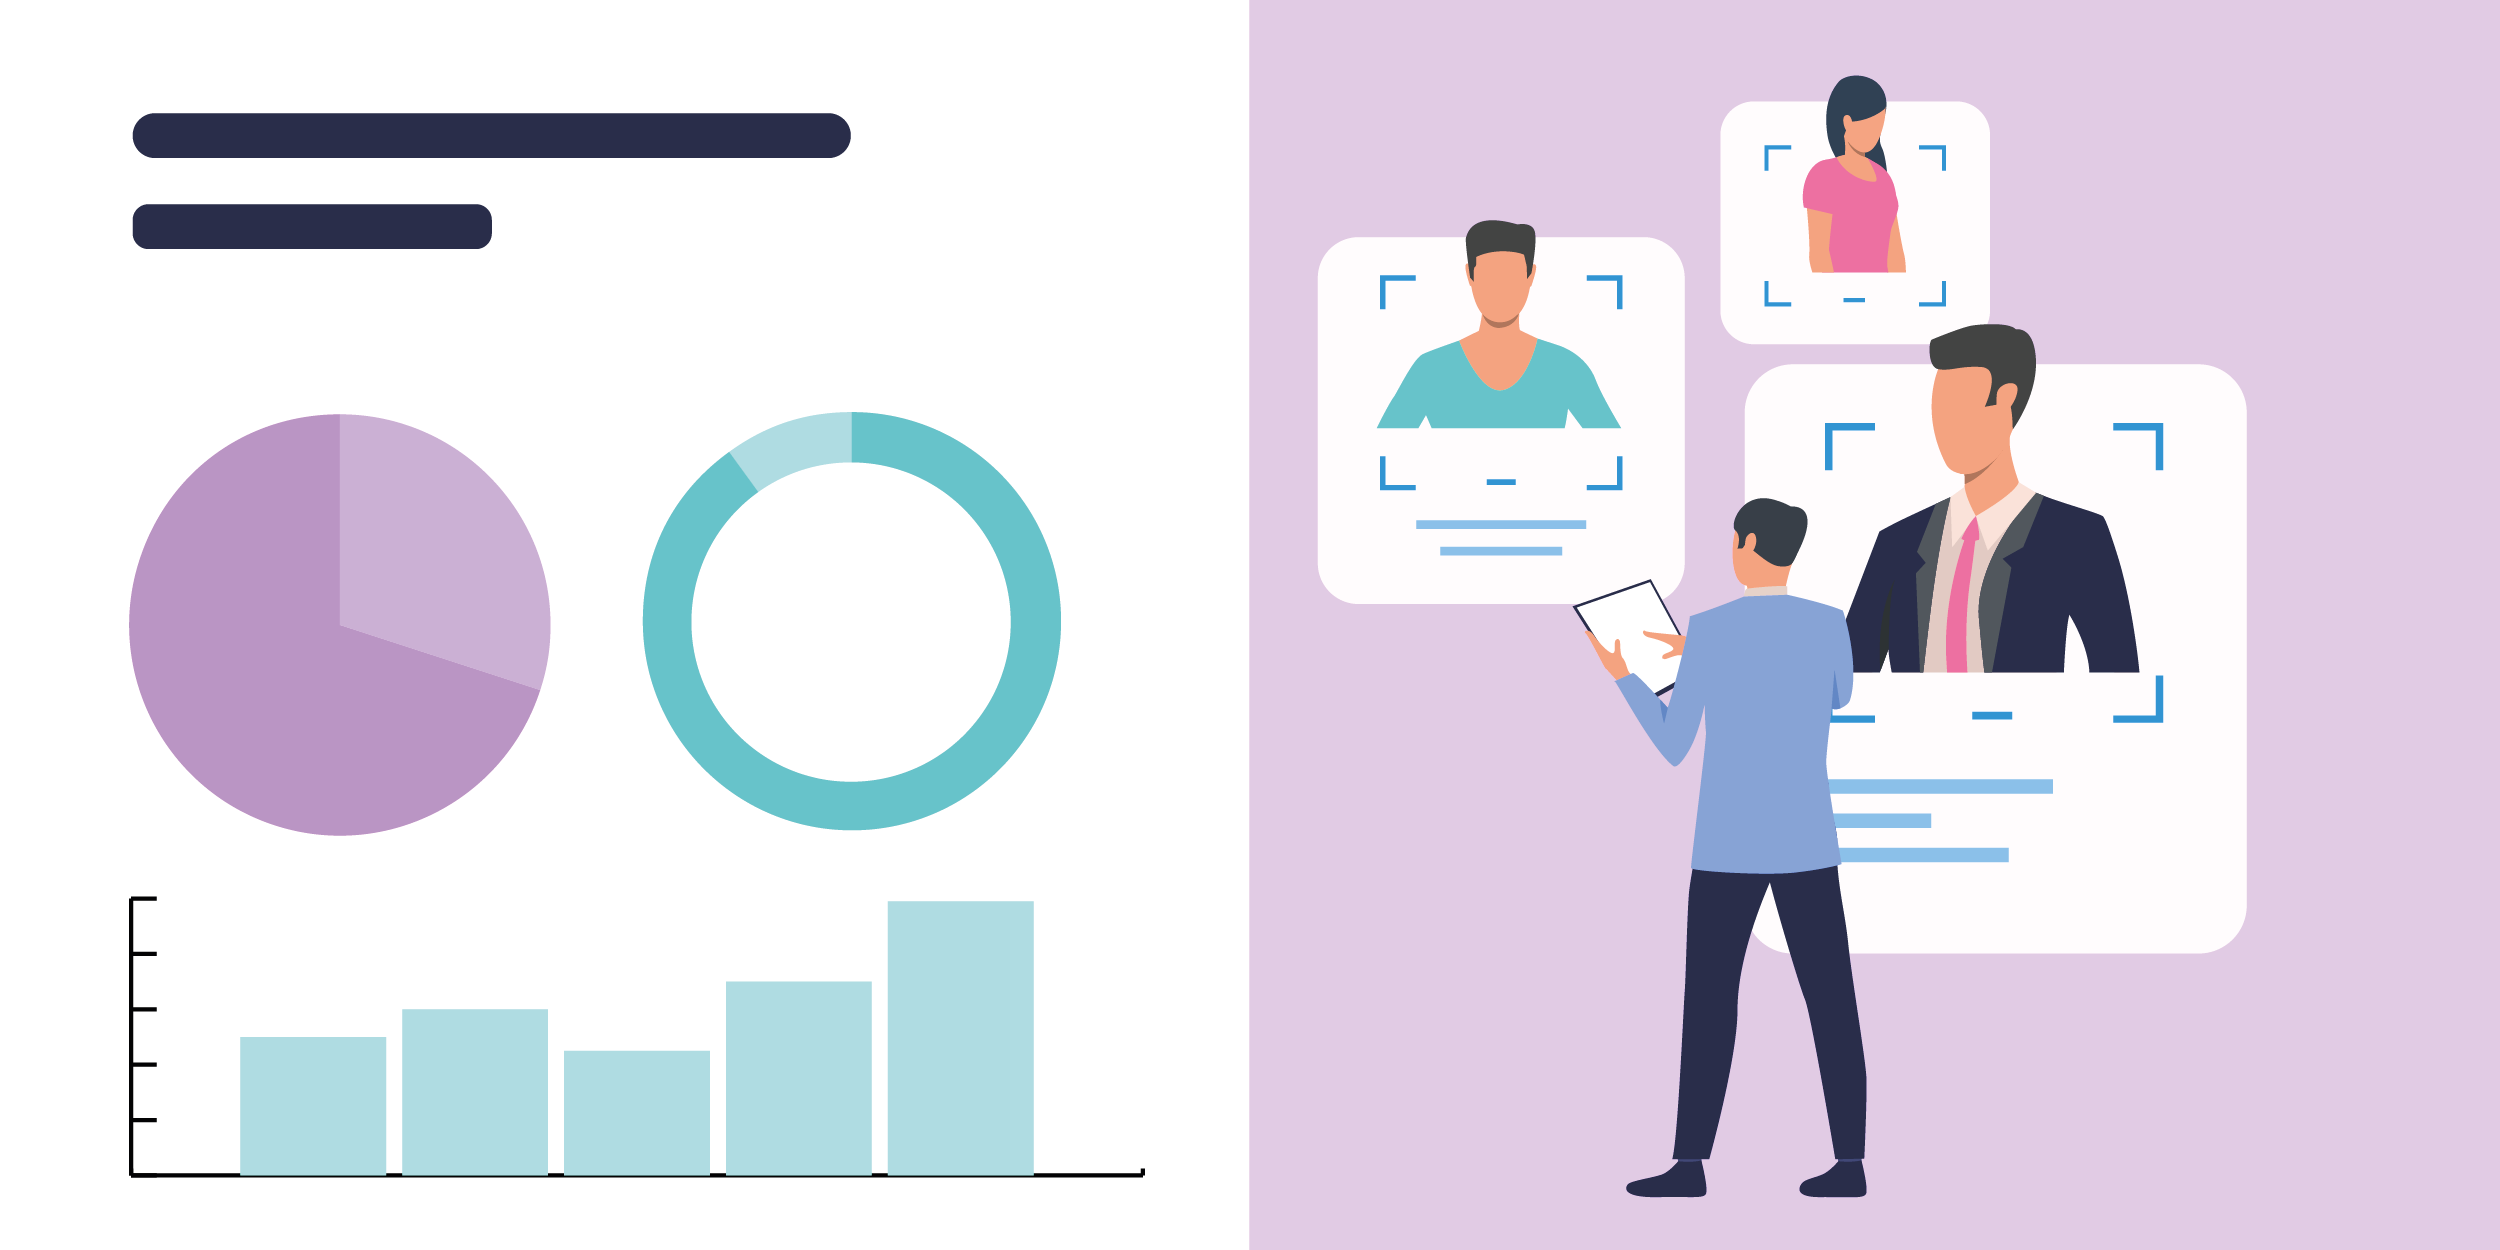

📑
-  `employee_id:`	Unique ID for employee	
-  `department:`	Department of employee
-  `region:`	Region of employment (unordered)
-  `education:`	Education Level
-  `gender:`	Gender of Employee
-  `recruitment_channel:`	Channel of recruitment for employee
-  `no_of_trainings:`	no of other trainings completed in previous year on soft skills, technical skills etc.
-  `age:`	Age of Employee
-  `previous_year_rating:` Employee Rating for the previous year
-  `length_of_service:` Length of service in years
-  `KPIs_met >80%:` if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
-  `awards_won?:` if awards won during previous year then 1 else 0
-  `avg_training_score:` Average score in current training evaluations
-  `is_promoted (Target):`	Recommended for promotion

# `Importing Libraries:` 

In [1]:
import os # Importing the 'os' module for operating system-related functionalities.
import math # Importing the 'math' module for mathematical operations and functions.
import numpy as np # Importing the 'numpy' library and assigning it an alias 'np' for numerical computing and array operations.
import pandas as pd # Importing the 'pandas' library and assigning it an alias 'pd' for data manipulation and analysis.
import seaborn as sns # Importing the 'seaborn' library and assigning it an alias 'sns' for data visualization and statistical graphics.
import tensorflow as tf # Importing the 'tensorflow' library and assigning it an alias 'tf' for building and training machine learning models.
import missingno as msno # Importing the 'missingno' library and assigning it an alias 'msno' for visualizing missing data patterns.
from sklearn import metrics # Importing the 'metrics' module from the 'sklearn' library for evaluating model performance.
import plotly.express as px # The plotly.express module (usually imported as px ) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX.
import matplotlib.pyplot as plt # Importing the 'pyplot' module from the 'matplotlib' library and assigning it an alias 'plt' for creating plots and visualizations.
from sklearn.utils import resample # Resample arrays or sparse matrices in a consistent way.
from sklearn.metrics import f1_score # Compute the F1 score, also known as balanced F-score or F-measure.
from sklearn.utils import class_weight # Importing the 'class_weight' module from the 'sklearn.utils' module for handling class imbalance in machine learning models.
from imblearn.over_sampling import SMOTE # SMOTE is a popular oversampling technique used to handle imbalanced datasets by generating synthetic samples for the minority class, thereby addressing the class imbalance problem.
from sklearn.metrics import recall_score # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
from sklearn.metrics import precision_score # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
from sklearn.preprocessing import LabelEncoder # lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.model_selection import GridSearchCV # GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Importing the 'StandardScaler' and 'MinMaxScaler' classes from the 'sklearn.preprocessing' module for feature scaling and normalization.
from sklearn.metrics import confusion_matrix, classification_report # Compute precision, recall, F-measure and support for each class. confusion_matrix. Compute confusion matrix to evaluate the accuracy of a classification.

In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.resetwarnings()

In [52]:
# read train and test datasets.
train = pd.read_csv('dm_train.csv')
test = pd.read_csv('dm_test.csv')

In [53]:
# Print Shape of data 
print("Shape of Train dataset is :",train.shape)

Shape of Train dataset is : (54808, 14)


In [54]:
# Print Shape of data 
print("Shape of Test dataset is : ", test.shape)

Shape of Test dataset is :  (23490, 13)


In [55]:
 # Return top n (5 by default) rows of a data frame or series. Syntax: Dataframe.head(n=5). 
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [56]:
 # Return top n (5 by default) rows of a data frame or series. Syntax: Dataframe.head(n=5).
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [57]:
# The columns property returns the label of each column in the DataFrame.
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [58]:
# Get Information about dataset.
# Prints information about the DataFrame. 
# The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [60]:
# Describing the training and testing set, generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [61]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000





<div class="alert alert-block alert-info">
<b>It is quite clear that we are not having Outliers in our Dataset, the average training score for most of the Employee lie between 40 to 100, which is a very good distribution, also th mean is 50. Also, the Length of service, is not having very disruptive values, so we can keep them for model training. they are not going to harm us a lot.</b> 
</div>


---

# `Checking if there are any null values:  `

- There are so many types of Missing Values such as
  - Missing values at Random
  - Missing values at not Random
  - Missing Values at Completely Random

---

- What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
  - We can use Business Logic to Impute the Missing Values
  - We can use Statistical Methods such as Mean, Median, and Mode.
  - We can use ML Techniques to impute the Missing values
  - We can delete the Missing values, when the Missing values percentage is very High.


---
- We observe that there are missing values in only two columns: `education` and `previous_year_rating` This pattern suggests that the missing values may not be random. To handle these missing values, we follow a two-step approach:

---


- First, we check if there is any identifiable pattern or business logic behind the missing values. If such a pattern exists, we apply specific business rules or logic to handle those missing values.


-  If no pattern or logic is identified, we resort to imputing the missing values with central tendency values. 
    - For Continuous columns, we use the mean value
    - For Categorical columns, we use the mode value. 
    - This approach helps us fill in the missing values based on the most common or representative values in the respective columns.
    
    
- When to use Mean, and when to use Median?
  - We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
  - We use Median, when we have outliers in the dataset for the Numerical Variables.
  - We use Mode, When we have Categorical Variables.

In [62]:
# Returns the number of missing values in the dataset.
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<div class="alert alert-block alert-info">
<b>The Missingno is the Python library compatible with pandas and has a really excellent visualization of the distribution of NaN values. This library is built on matplotlib thus any graphs it produces will be static.</b> 
</div>

<AxesSubplot:>

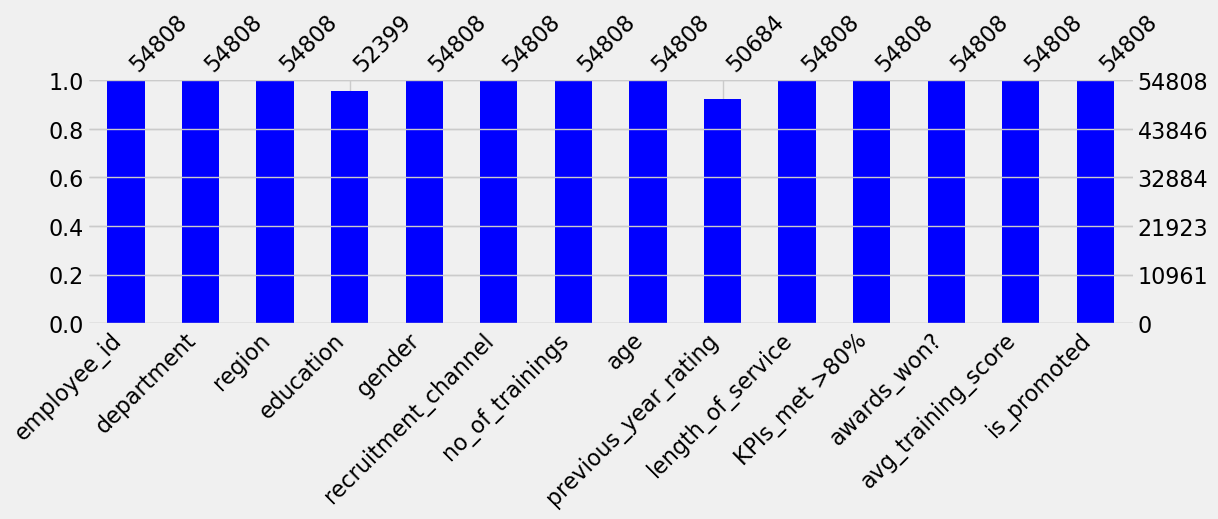

In [63]:
# Visualizing Null Values 
msno.bar(train, color = 'b' , figsize = (12,3))

In [64]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<AxesSubplot:>

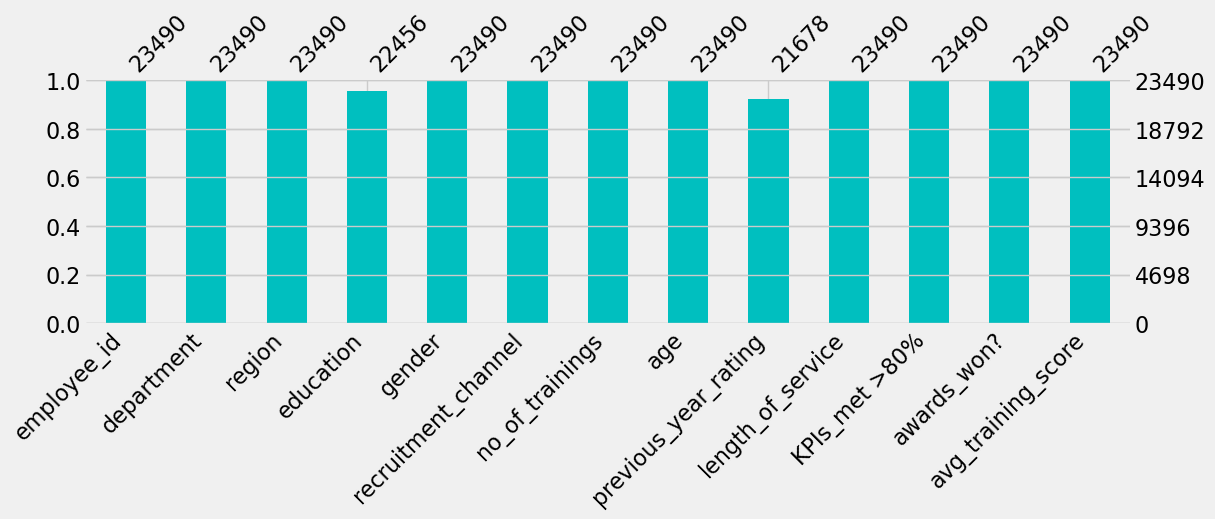

In [65]:
msno.bar(test, color = 'c' , figsize = (12,3))

In [66]:
#total missing data
#percentage of missing values
total_number = train.isnull().sum()
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing,
                                 'total_cells _of_missing_values': total_number
                                })

missing_value_df

,column_name,percent_missing,total_cells _of_missing_values
employee_id,employee_id,0.000000,0
department,department,0.000000,0
region,region,0.000000,0
education,education,4.395344,2409
gender,gender,0.000000,0
recruitment_channel,recruitment_channel,0.000000,0
no_of_trainings,no_of_trainings,0.000000,0
age,age,0.000000,0
previous_year_rating,previous_year_rating,7.524449,4124
length_of_service,length_of_service,0.000000,0


<div class="alert alert-block alert-info">
<b>My note:</b> 
    
    
    1. It can be seen that only two columns contains missing values in Train and Test Dataset both.
    
    2. Also, the Percentage of Missing values is around 4 and 7% in education, and previous_year_rating respectively. 
    
    2. The education column and the previous_year_rating. This can be indicative of non-random missing value.
    
    3. To deal with the missing value, we first check if we can discover a pattern in the missing value:
        - If so, we deal with the missing value with business logic.
        - Else we impute the central tendency values (mean for continuous columns and mode for categorical column.
</div>

### `Null Values in previous_year_rating column :`

In [67]:
# Filters the DataFrame train to only include rows where the "previous_year_rating" column has missing values (is null)
train[train['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [68]:
# It selects rows where the "length_of_service" column is equal to 1.
train.query('length_of_service==1', engine='python')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [69]:
# This line of code uses the query method to filter the DataFrame train based on two conditions. 
# It selects rows where the "length_of_service" column is equal to 1 and the "previous_year_rating" column is null (missing value). 
# The engine='python' parameter specifies to use the Python engine for evaluating the query.
train.query('length_of_service==1 & previous_year_rating.isnull()', engine='python')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [70]:
query = train.query('length_of_service != 1')['previous_year_rating'].isna().any()
query

False

<div class="alert alert-block alert-info">
<b>My note:</b> 
    
    
    From previous code steps:
    - All employers who are new to the company (length_of_service = 1) have NaN for previous_year_rating column.
    - This confirm that all  NaN values for previous_year_rating column are for employees who did not complete a year in the company. So, there is not rating for them. 
</div>

### `Null Values in education column :`

In [71]:
# Filters the DataFrame train to only include rows where the "education" column has missing values (is null)
train[train['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


In [72]:
train['education'].mode()

0    Bachelor's
Name: education, dtype: object

<div class="alert alert-block alert-info">
<b>My note:</b> 
    
    
    From previous code steps:
    - There is no pattern we can notice for education column according to missing values.

</div>

### `How to handle missing values in  "previous_year_rating" and "education"  column:`

In [73]:
# The first two lines handle missing values in the 'education' column. 
# The missing values are filled with the mode (most common) value of the 'education' column in the train DataFrame for train data and in the test DataFrame for test data.
# The next two lines handle missing values in the 'previous_year_rating' column. 
# The missing values are filled with the value 0 in both the train and test DataFrames.
train['education']=train['education'].fillna(train.education.mode()[0])
test['education']=test['education'].fillna(test.education.mode()[0])
train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [74]:
# The first line uses the isnull() function to identify null values in the training dataset (train). 
# The sum() function is then applied twice to get the total count of null values across all columns. 
# The result is printed along with a descriptive message.
# The second line follows the same process as the first line but for the test dataset (test), providing the count of null values in the test dataset along with an appropriate message.
print('No of null values  in the training dataset', train.isnull().sum().sum())
print('No of null values in the test dataset', test.isnull().sum().sum())

No of null values  in the training dataset 0
No of null values in the test dataset 0


<div class="alert alert-block alert-info">
<b>My note:</b> 
    
    From previous code steps:
    - So, do not have delete any missing values, we can simply impute the values using Mean, Median, and Mode Values.
    - The problem of null values was solved by:
        - Filling previous_year_rating column by Zero 
            - Which indicates that this customer is new to the comapny and has not rating for previous year.
        - Filling education column by mode value which is bachelor.
</div>

---

# `Checking if there are outliers in dataset ? :  `

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>What are outliers :</b></font>  
        Outliers are data points that significantly deviate from the majority of the data in a dataset. These are data points that are unusually high or low compared to the other observations. Outliers can occur due to various reasons such as measurement errors, data entry mistakes, natural variations, or even indicative of rare events or anomalies in the data.


<font color="white" size=+1.0><b>Detecting outliers is important for several reasons:
</b></font>  

<ul>
<li> Data Quality: Outliers can be a result of errors or anomalies in data collection, recording, or entry. Identifying and dealing with outliers helps to ensure data quality and integrity.


<li> Statistical Analysis: Outliers can have a significant impact on statistical analysis and model performance. They can distort summary statistics such as mean and standard deviation, leading to biased results. By detecting and addressing outliers, we can ensure the accuracy and reliability of statistical analysis.


<li> Data Preprocessing: Outliers can affect the performance of machine learning algorithms. They can skew the distribution, impact feature scaling, and influence the behavior of algorithms. Detecting and handling outliers as part of data preprocessing helps to improve the effectiveness of machine learning models.



</ul>        
</blockquote>

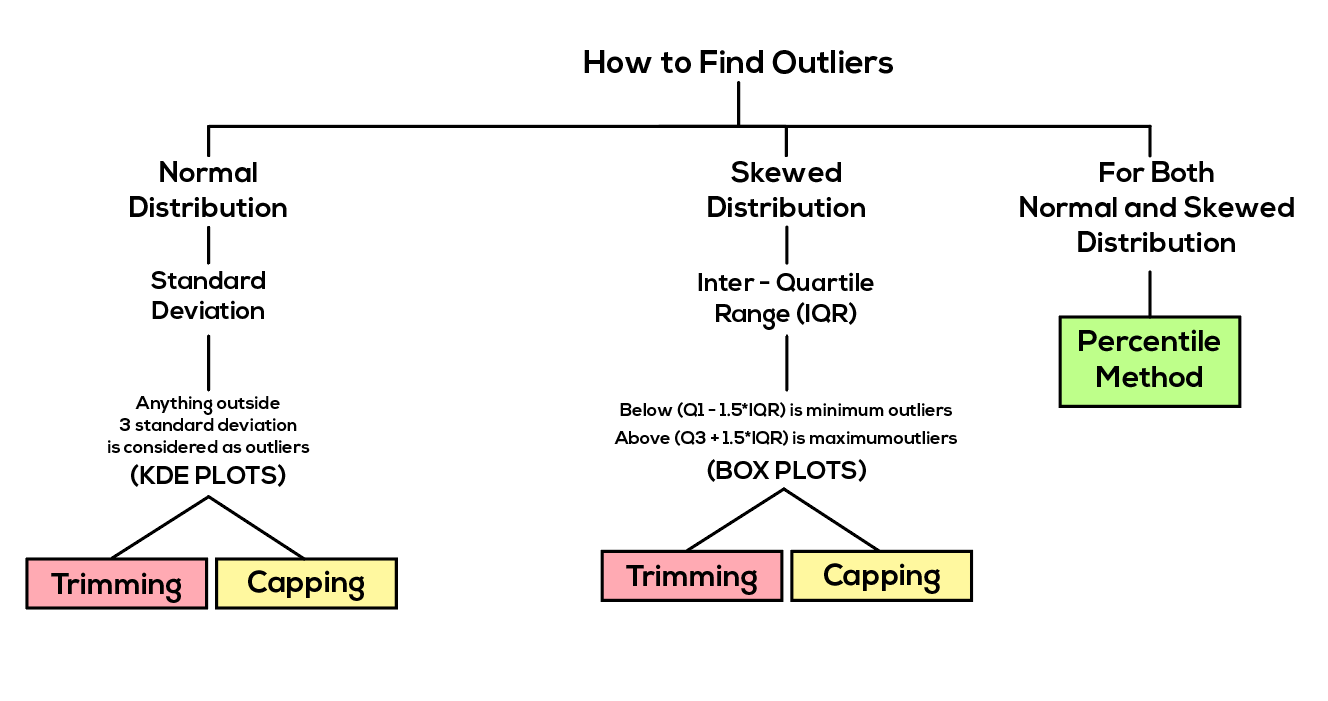

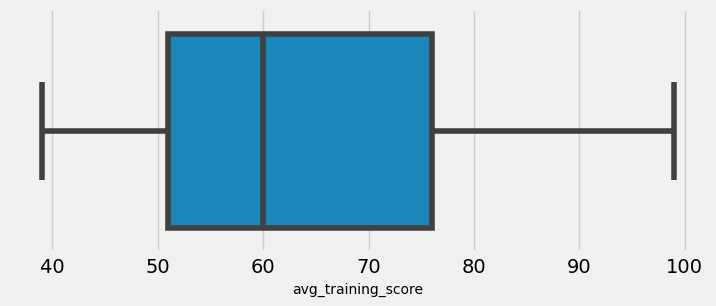

In [75]:
plt.figure(figsize=(8, 3)) # Set the figure size
sns.boxplot(x=train["avg_training_score"]) # Create a boxplot for the specified column
plt.xlabel("avg_training_score",fontsize=10) # Set the x-axis label to the column name
plt.show() # Show the boxplot

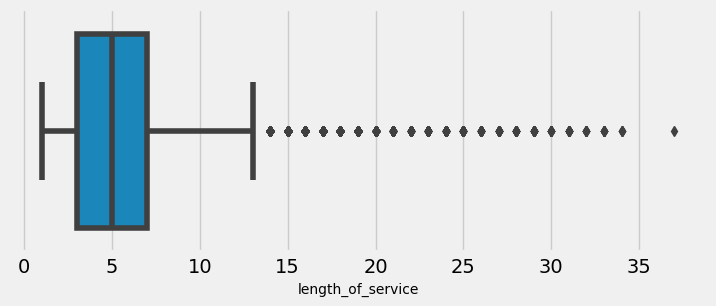

In [76]:
plt.figure(figsize=(8, 3)) # Set the figure size
sns.boxplot(x=train["length_of_service"]) # Create a boxplot for the specified column
plt.xlabel("length_of_service",fontsize=10) # Set the x-axis label to the column name
plt.show() # Show the boxplot

In [77]:
train.shape

(54808, 14)

<div class="alert alert-block alert-info">
<b>My note:</b> 
    
    - For outliers, we only check the numerial columns: avg_training_score, length_of_service. As other variables have a limited number of values.
    - There is no outlier in the avg_training_score column.
    - We do not need to remove these values, as the values are not very far and Huge.
</div>

---

# `Drop Columns & Feature Engineering :  `

In [78]:
# Identify and print the categorical columns in a dataset, along with their unique values. 
# It provides an overview of the categorical variables present in the dataset and the distinct categories within each column.
#Replace 'train' with the actual name of your DataFrame
# Get the list of categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# Print the unique values of each categorical column
for column in categorical_columns:
    unique_values = train[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------------------")

Column: department
Unique Values: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
-----------------------------------
Column: region
Unique Values: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
-----------------------------------
Column: education
Unique Values: ["Master's & above" "Bachelor's" 'Below Secondary']
-----------------------------------
Column: gender
Unique Values: ['f' 'm']
-----------------------------------
Column: recruitment_channel
Unique Values: ['sourcing' 'other' 'referred']
-----------------------------------


In [79]:
# This line of code creates a new column called 'total_score' in the 'train' DataFrame by multiplying the 'avg_training_score' column with the 'no_of_trainings' column. 
# It calculates the total score for each employee in the training dataset.
# Similarly, it creates the 'total_score' column in the 'test' DataFrame by multiplying the respective columns.
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']
# Remove uneccessary features.
# These lines of code remove the 'region' , 'employee_id', recruitment_channel columns from the 'train' and 'test' DataFrames using the drop method. 
#The axis=1 parameter indicates that columns are being dropped.
train = train.drop(['region', 'employee_id','recruitment_channel'], axis = 1)
test = test.drop([ 'region', 'employee_id','recruitment_channel'], axis = 1)

In [80]:
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'total_score'],
      dtype='object')

In [81]:
test.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'total_score'],
      dtype='object')

# `Label Encoding for Categorical Columns :  `

In [82]:
le = LabelEncoder() # This line of code creates an instance of the LabelEncoder class, which is used for encoding categorical variables into numerical labels.
# These lines of code replace the values in the 'education' column of the 'train' and 'test' DataFrames with numerical labels based on their degree of importance. 
# For example, "Master's & above" is replaced with 3, "Bachelor's" with 2, and "Below Secondary" with 1.
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3, 2, 1))
# These lines of code use the fit_transform method of the LabelEncoder to encode the 'department' and 'gender' columns of the 'train' and 'test' DataFrames. 
# The categorical values are transformed into numerical labels.
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

In [83]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,73


# `Checking if dataset is imbalanced or not? :  `

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



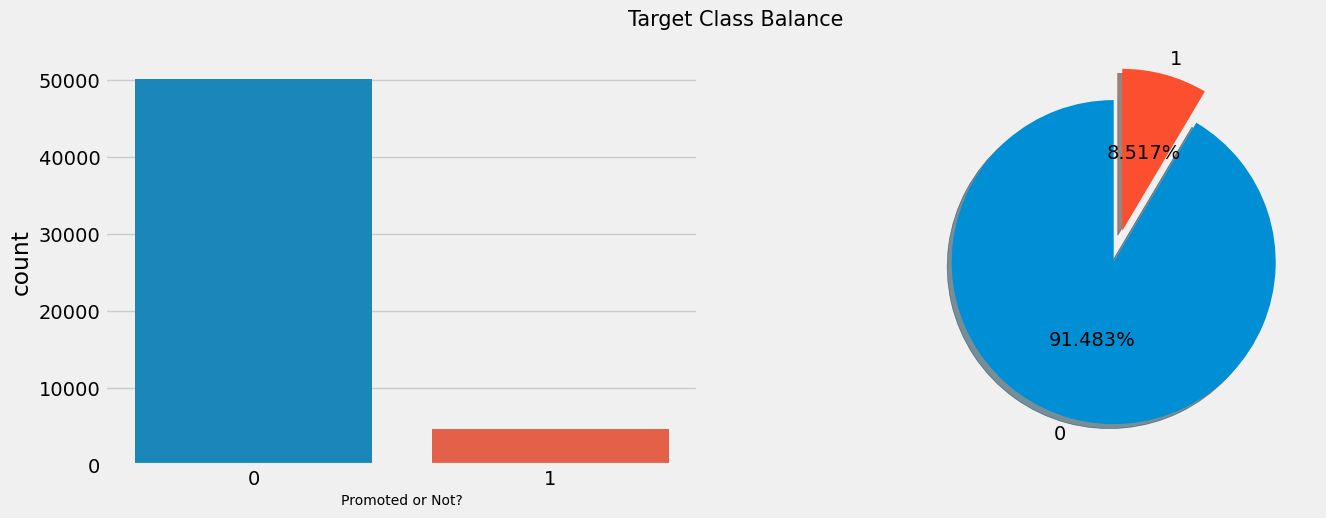

In [84]:
# This controls the overall size of the plot.
plt.rcParams['figure.figsize'] = (15, 5) # Set the figure size for the plot to (15, 5) using the rcParams dictionary from matplotlib.pyplot. 
plt.style.use('fivethirtyeight') # Apply the 'fivethirtyeight' style to the plot. This sets the visual style of the plot according to the specified style.
plt.subplot(1, 2, 1) # Create a subplot with a 1x2 grid and set the current plot to the first subplot.
sns.countplot(train['is_promoted'],) # Create a countplot using seaborn (sns) library, based on the 'is_promoted' column of the 'train' DataFrame. This plot visualizes the count of each category in the 'is_promoted' column.
plt.xlabel('Promoted or Not?', fontsize = 10) # Set the label for the x-axis of the current plot to 'Promoted or Not?' with a font size of 10.
plt.subplot(1, 2, 2) # Set the current plot to the second subplot in the 1x2 grid.
# Create a pie chart based on the value counts of the 'is_promoted' column of the 'train' DataFrame. 
# The pie chart represents the proportion of each category ('1' and '0') in the 'is_promoted' column.
train['is_promoted'].value_counts().plot(kind = 'pie', 
                                         explode = [0, 0.2], autopct = '%.3f%%', startangle = 90,
                                         labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off') # Turn off the axis display for the current plot. This removes the axis lines and labels.
plt.suptitle('Target Class Balance', fontsize = 15) # Set the super title for the entire figure to 'Target Class Balance' with a font size of 15. This title appears on top of the subplots.
plt.show() # Display the complete figure with all the subplots and titles.

In [85]:
train['is_promoted'].value_counts(normalize=True) * 100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

<div class="alert alert-block alert-info">
<b>My note:</b> 
  
    - Data is highly imbalanced.
    - 91.48% are not promoted.
    - 8.51% are promoted.
</div>

### `Handling Missing data with undersample the majority class:`

<div>
<img src="https://michael-fuchs-python.netlify.app/post/2020-01-16-dealing-with-imbalanced-classes_files/p37s3.png">    
</div>
<div>   

In [86]:

# Separate the features and target variable
X = train.drop('is_promoted', axis=1)
Y = train['is_promoted']

# Concatenate the features and target variable
data = pd.concat([X, Y], axis=1)

# Split the data into majority and minority classes
majority_class = data[data['is_promoted'] == 0]
minority_class = data[data['is_promoted'] == 1]

# Undersample the majority class
majority_undersampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([majority_undersampled, minority_class])

# Separate the features and target variable from the undersampled data
undersampled_X = undersampled_data.drop('is_promoted', axis=1)
undersampled_Y = undersampled_data['is_promoted']
undersampled_data.shape

(9336, 12)

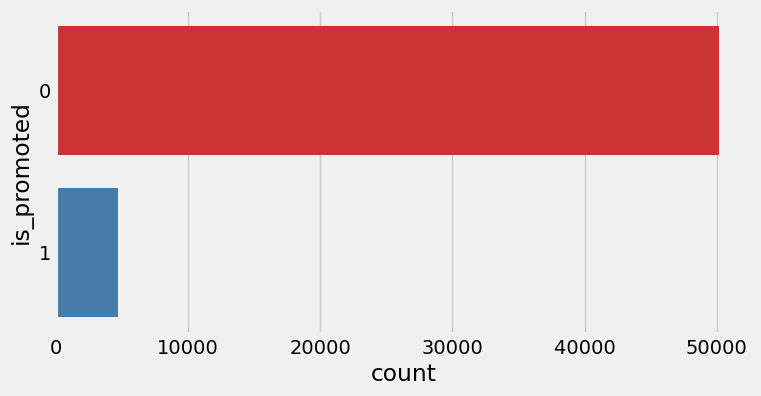

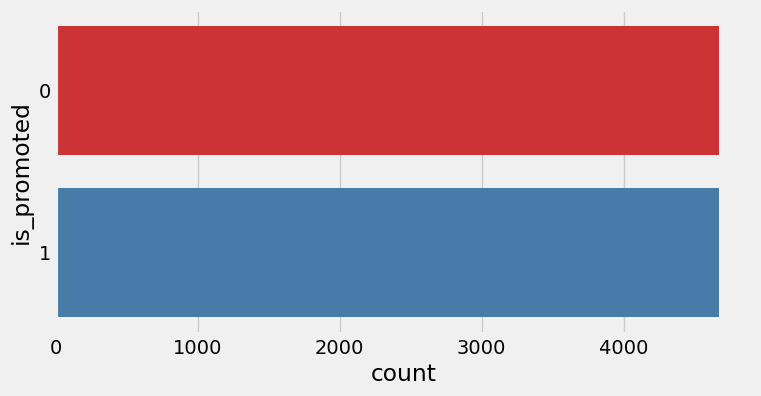

In [87]:
# We can also plot attribute Class
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="is_promoted", data=train, palette="Set1")
plt.show()
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="is_promoted", data=undersampled_data, palette="Set1")
plt.show()

<div class="alert alert-block alert-info">
<b>My note:</b> 
  
    - Random undersampling may make the resulting dataset too small for the model to learn from.
    - It only works when we have enough number of examples.
</div>

### `Handling Missing data with KNN:`

<div>
<img src="http://miro.medium.com/max/2760/1*bSOwLuDleEEGiuw7PtooOQ.png">    
</div>
<div>   

In [88]:
X=train.drop('is_promoted',axis=1).values
Y=train['is_promoted'].values
train_feature=train['is_promoted']
train_target=train['is_promoted']
#solving the inbalanced data using smote technique
smote = SMOTE(sampling_strategy='minority')
x_knn,y_knn = smote.fit_resample(X,Y)
x_knn_df = pd.DataFrame(x_knn)
y_knn_df = pd.DataFrame(y_knn)
y_knn_df.rename(columns = {0:'is_promoted'}, inplace = True)
train_knn = pd.concat([x_knn_df, y_knn_df], axis=1)

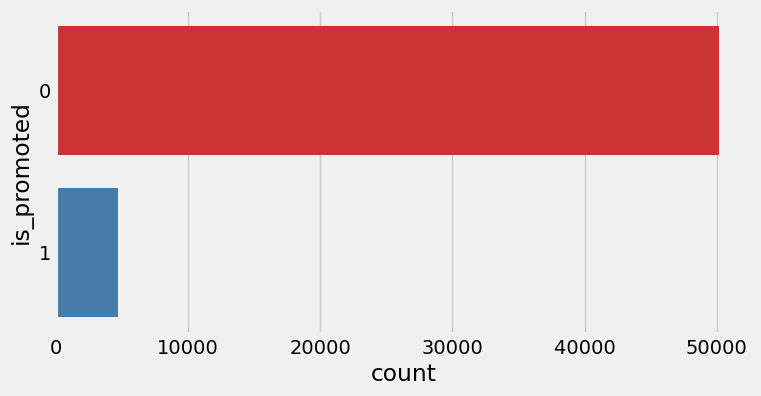

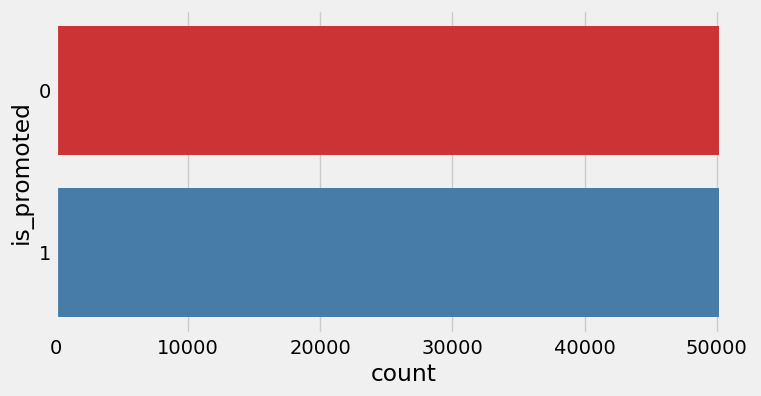

In [89]:
# We can also plot attribute Class
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="is_promoted", data=train, palette="Set1")
plt.show()
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="is_promoted", data=train_knn, palette="Set1")
plt.show()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , 
                          random_state=41,
                          train_size=0.8, shuffle=True)

In [91]:
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", X_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (43846, 11)
Shape of the y Train : (43846,)
Shape of the x Test : (10962, 11)
Shape of the y Test : (10962,)


In [92]:
X_train_under_sample, X_test_under_sample, y_train_under_sample, y_test_under_sample = train_test_split(undersampled_X,undersampled_Y , 
                          random_state=41,
                          train_size=0.8, shuffle=True)

In [93]:
print("Shape of the x Train :", X_train_under_sample.shape)
print("Shape of the y Train :", y_train_under_sample.shape)
print("Shape of the x Test :", X_test_under_sample.shape)
print("Shape of the y Test :", y_test_under_sample.shape)

Shape of the x Train : (7468, 11)
Shape of the y Train : (7468,)
Shape of the x Test : (1868, 11)
Shape of the y Test : (1868,)


In [94]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn_df,y_knn_df , 
                          random_state=41,
                          train_size=0.8,shuffle=True)

In [95]:
print("Shape of the x Train :", X_train_knn.shape)
print("Shape of the y Train :", y_train_knn.shape)
print("Shape of the x Test :", X_test_knn.shape)
print("Shape of the y Test :", y_test_knn.shape)

Shape of the x Train : (80224, 11)
Shape of the y Train : (80224, 1)
Shape of the x Test : (20056, 11)
Shape of the y Test : (20056, 1)


<div class="alert alert-block alert-info">
<b>My note:</b> 
  
    - We can use Random Oversampling but it usually causes overfitting because it duplicates the rows.
    - So, I used another approach called SMOTE.
    - It uses KNN to increase data.
    - It prevents overfitting because it doesnot use original data,
## Smote:
        - It creates synthetic examples of the rare class by compining original examples.
- Identify the minority class: The first step is to identify the minority class in the imbalanced dataset. The minority class refers to the class with fewer instances, while the majority class has more instances.

- Select a minority class instance: SMOTE randomly selects an instance from the minority class as the starting point for generating synthetic samples.

- Find k nearest neighbors: SMOTE determines the k nearest neighbors of the selected instance from the minority class. The value of k is a user-defined parameter.

- Generate synthetic samples: SMOTE creates synthetic samples by interpolating between the selected instance and its k nearest neighbors. It randomly selects a specific number of nearest neighbors (usually based on the desired oversampling ratio) and generates synthetic samples along the line connecting the selected instance and each neighbor.

- Repeat the process: Steps 2 to 4 are repeated until the desired level of oversampling is achieved or until the minority class is balanced with the majority class.
</div>

# `Naive Bayes:`

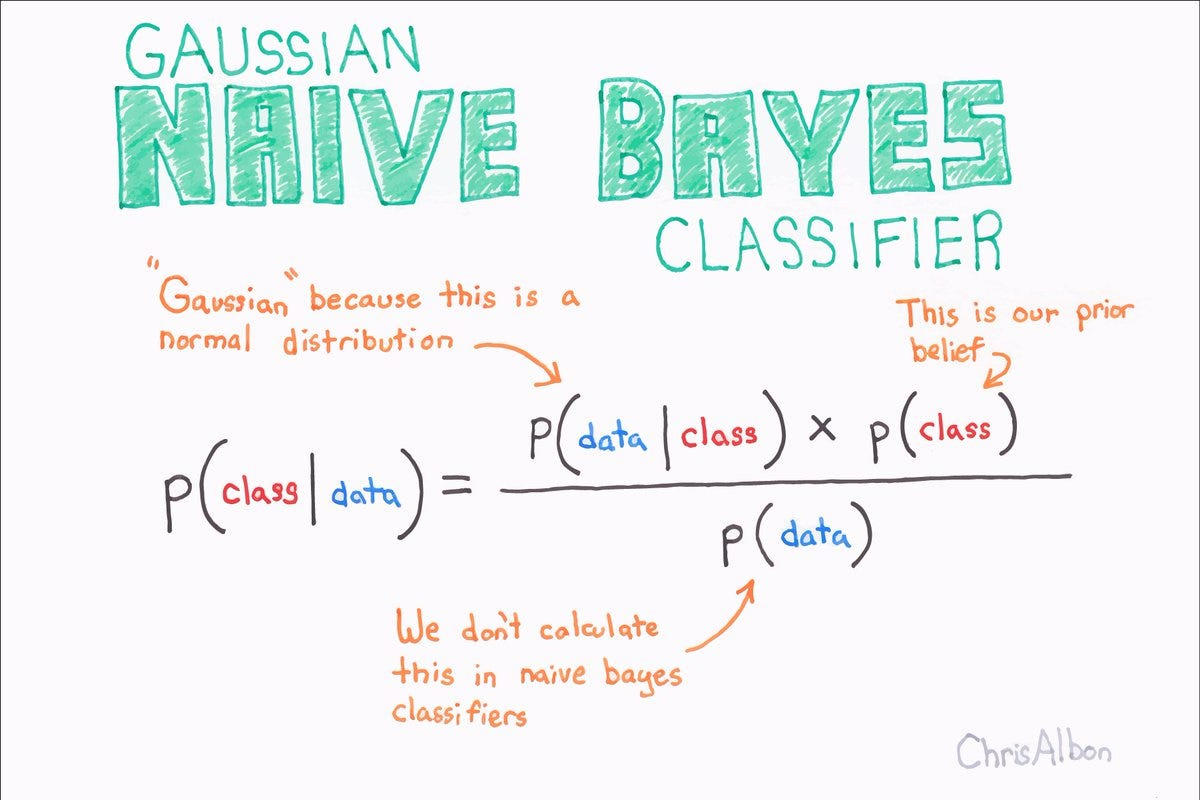

## `1. Original Data:`

In [96]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
print("Shape of the x Test :", X_test.shape)
print(f"Training Accuracy : {round((NB.score(X_train, y_train))*100,2)}%")
print(f"Testing Accuracy : {round((NB.score(X_test, y_test))*100,2)}%")
cm = confusion_matrix(y_test, y_pred)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Shape of the x Test : (10962, 11)
Training Accuracy : 91.36%
Testing Accuracy : 90.82%


D:\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



AUC score is :  0.79


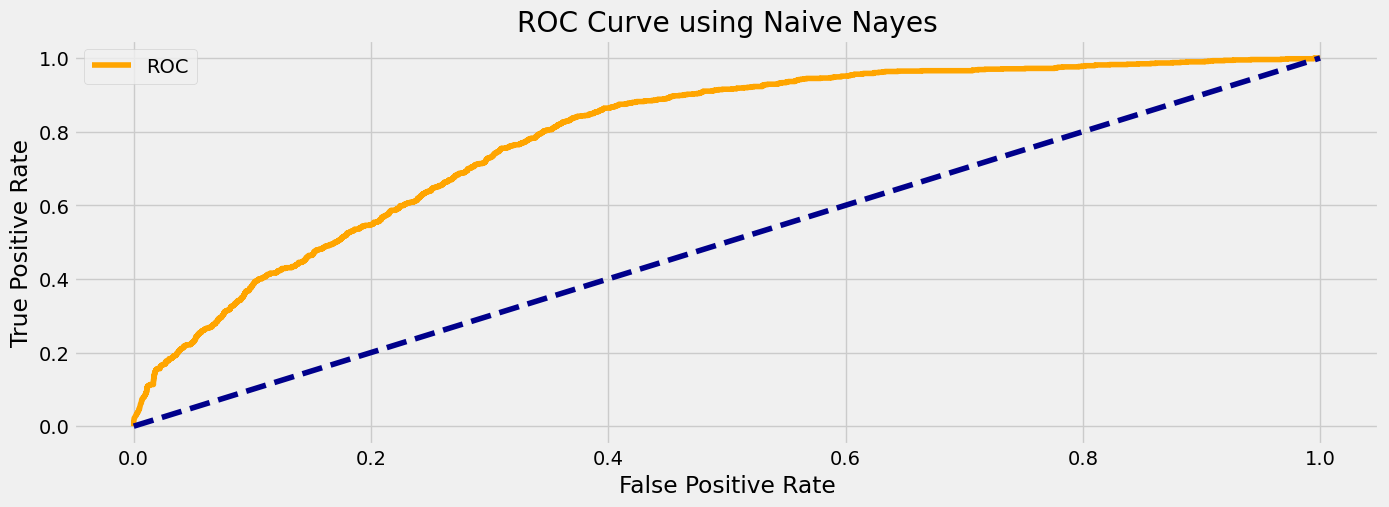

In [97]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
probs =NB.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print("AUC score is :  %.2f"%auc)
fpr, tpr, thresholds = roc_curve(y_test,probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Naive Nayes')
plt.legend() 
plt.show()

## `2.Over Sampled Data using KNN :` 

In [50]:
NB.fit(X_train_knn,y_train_knn)
y_pred_knn =NB.predict(X_test_knn)
print(f"Training Accuracy : {round((NB.score(X_train_knn, y_train_knn))*100,2)}%")
print(f"Testing Accuracy : {round((NB.score(X_test_knn, y_test_knn))*100,2)}%")
print("Shape of the x Test :", X_test_knn.shape)
cm = confusion_matrix(y_test_knn, y_pred_knn)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Training Accuracy : 68.99%
Testing Accuracy : 69.34%
Shape of the x Test : (20056, 11)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



## `3.Under Sampled Data :` 

In [49]:
NB.fit(X_train_under_sample,y_train_under_sample)
y_pred_under_sample =NB.predict(X_test_under_sample)
print("Shape of the x Test :", X_test_under_sample.shape)
print(f"Training Accuracy : {round((NB.score(X_train_under_sample, y_train_under_sample))*100,2)}%")
print(f"Testing Accuracy : {round((NB.score(X_test_under_sample, y_test_under_sample))*100,2)}%")
cm = confusion_matrix(y_test_under_sample, y_pred_under_sample)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Shape of the x Test : (1868, 11)
Training Accuracy : 65.85%
Testing Accuracy : 66.17%


---
---

# `KNN:`

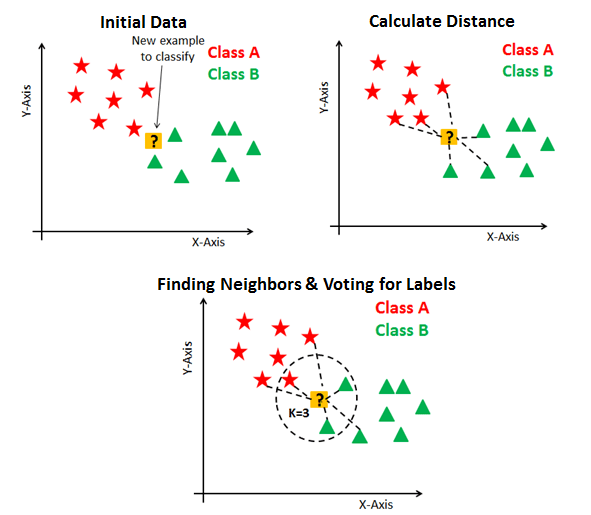

## `1. Original Data :` 

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(f"Training Accuracy : {round((knn.score(X_train, y_train))*100,2)}%")
print(f"Testing Accuracy : {round((knn.score(X_test, y_test))*100,2)}%")
cm = confusion_matrix(y_test, y_pred)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Training Accuracy : 94.31%


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Testing Accuracy : 92.1%


AUC score is :  0.68


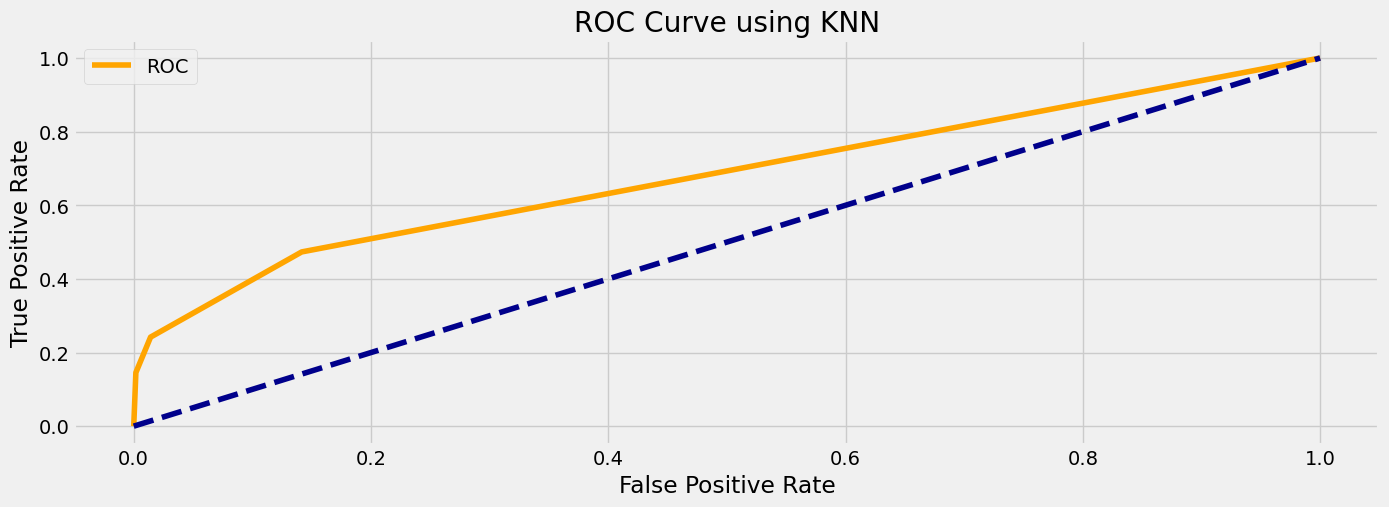

In [51]:
probs =knn.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print("AUC score is :  %.2f"%auc)
fpr, tpr, thresholds = roc_curve(y_test,probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using KNN')
plt.legend() 
plt.show()

## `2. Over Sampled Data using KNN :` 

In [52]:
knn.fit(X_train_knn,y_train_knn)
y_pred_knn =knn.predict(X_test_knn)
print(f"Training Accuracy : {round((knn.score(X_train_knn, y_train_knn))*100,2)}%")
print(f"Testing Accuracy : {round((knn.score(X_test_knn, y_test_knn))*100,2)}%")
cm = confusion_matrix(y_test_knn, y_pred_knn)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value 

Training Accuracy : 94.73%


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Testing Accuracy : 90.72%


## `3. Under Sampled Data :` 

In [53]:
knn.fit(X_train_under_sample,y_train_under_sample)
y_pred_under_sample =knn.predict(X_test_under_sample)
print(f"Training Accuracy : {round((knn.score(X_train_under_sample, y_train_under_sample))*100,2)}%")
print(f"Testing Accuracy : {round((knn.score(X_test_under_sample, y_test_under_sample))*100,2)}%")
cm = confusion_matrix(y_test_under_sample, y_pred_under_sample)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Training Accuracy : 83.89%
Testing Accuracy : 64.88%


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



---
---

# `Decision Tree:`

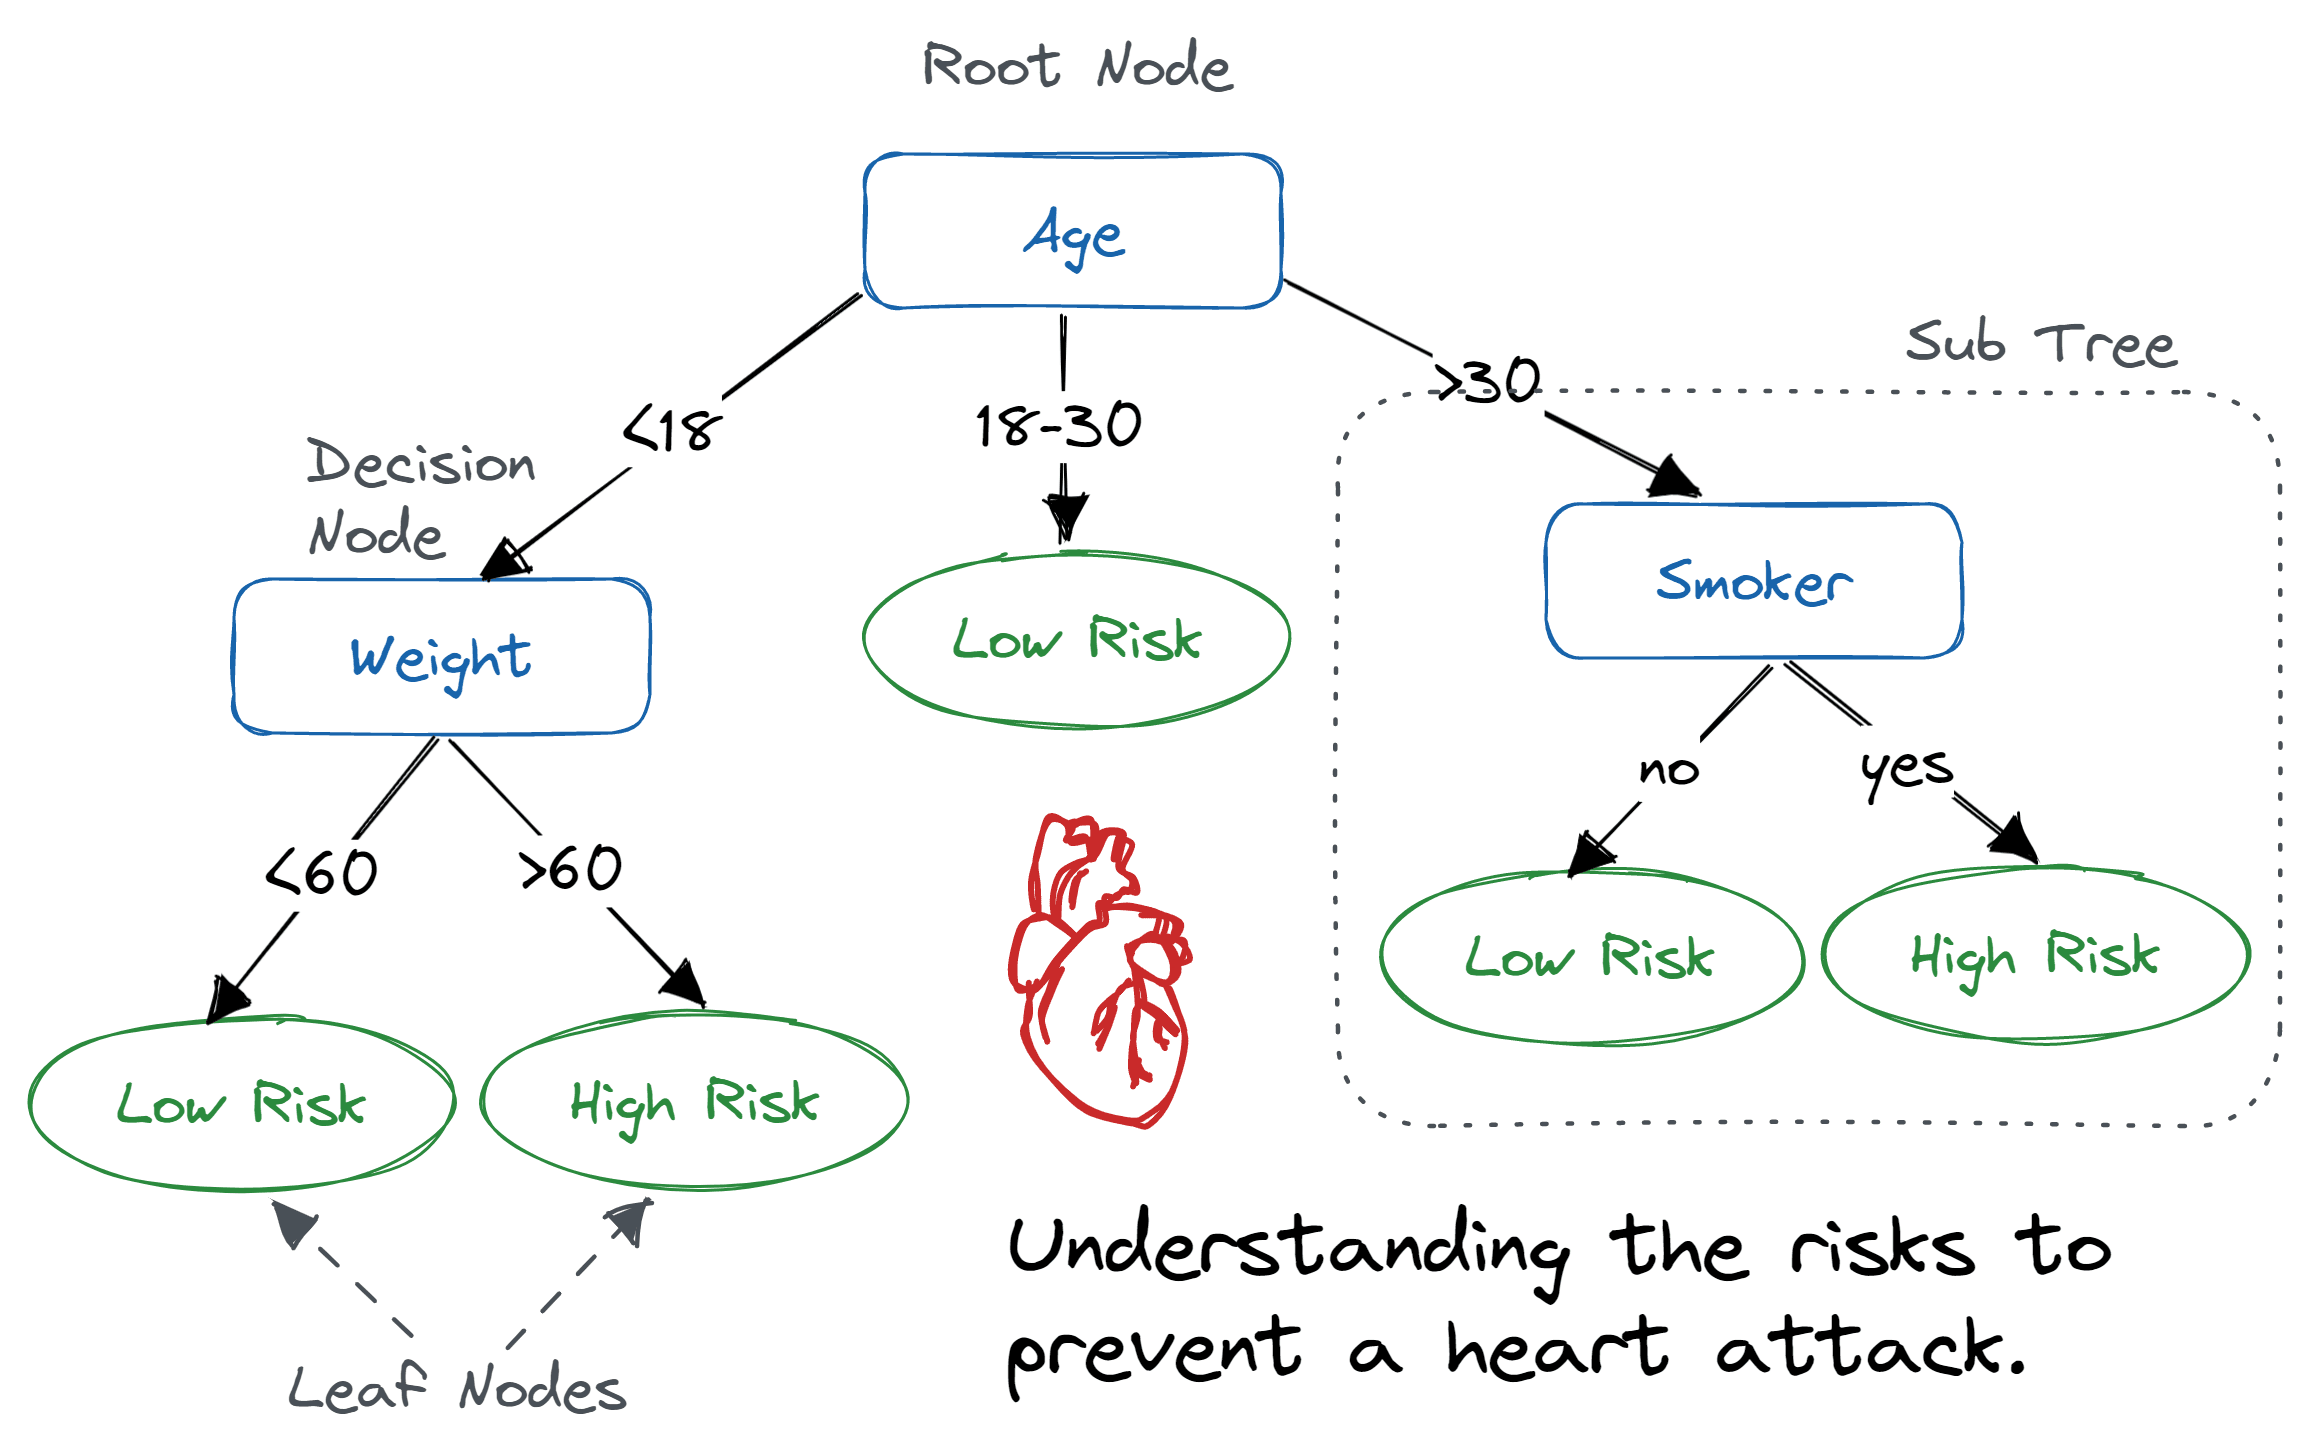

## `1. Original Data :` 

In [54]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print("Shape of the x Test :", X_test.shape)
print(f"Training Accuracy : {round((DT.score(X_train, y_train))*100,2)}%")
print(f"Testing Accuracy : {round((DT.score(X_test, y_test))*100,2)}%")
cm = confusion_matrix(y_test, y_pred)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Shape of the x Test : (10962, 11)
Training Accuracy : 99.35%
Testing Accuracy : 89.67%


AUC score is :  0.69


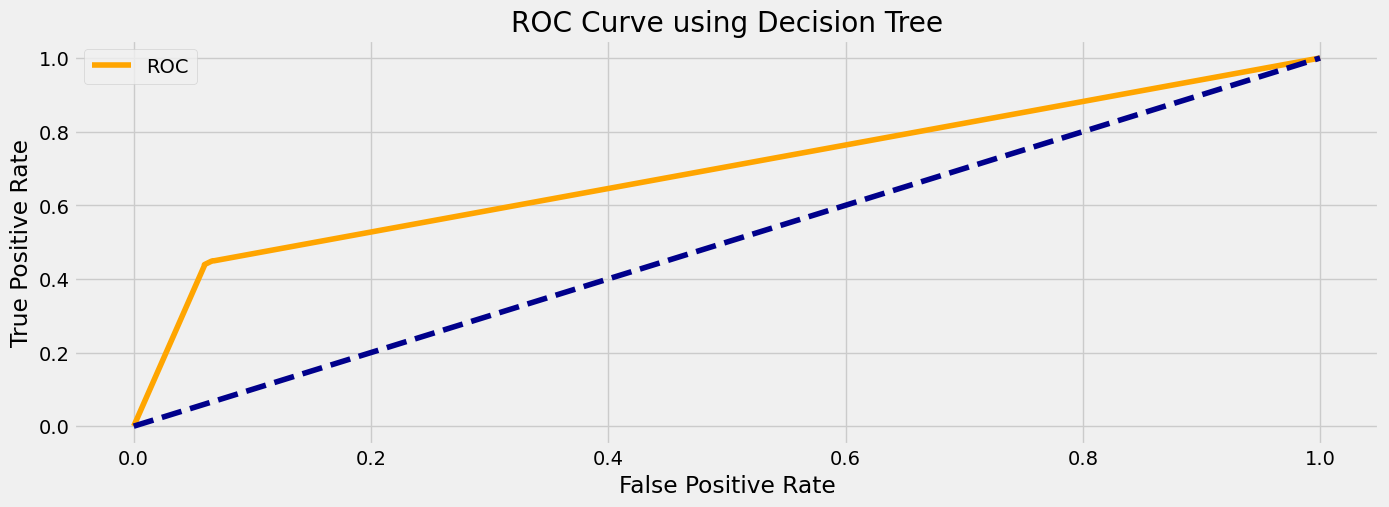

In [55]:
probs =DT.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print("AUC score is :  %.2f"%auc)
fpr, tpr, thresholds = roc_curve(y_test,probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Decision Tree')
plt.legend() 
plt.show()

## `2. Over Sampled Data using KNN :` 

In [56]:
DT.fit(X_train_knn,y_train_knn)
y_pred_knn =DT.predict(X_test_knn)
print("Shape of the x Test :", X_test_knn.shape)
print(f"Training Accuracy : {round((DT.score(X_train_knn, y_train_knn))*100,2)}%")
print(f"Testing Accuracy : {round((DT.score(X_test_knn, y_test_knn))*100,2)}%")
cm = confusion_matrix(y_test_knn, y_pred_knn)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Shape of the x Test : (20056, 11)
Training Accuracy : 99.66%
Testing Accuracy : 94.36%


## `3. Under Sampled Data :` 

In [57]:
DT.fit(X_train_under_sample,y_train_under_sample)
y_pred_under_sample =DT.predict(X_test_under_sample)
print("Shape of the x Test :", X_test_under_sample.shape)
print(f"Training Accuracy : {round((DT.score(X_train_under_sample, y_train_under_sample))*100,2)}%")
print(f"Testing Accuracy : {round((DT.score(X_test_under_sample, y_test_under_sample))*100,2)}%")
cm = confusion_matrix(y_test_under_sample, y_pred_under_sample)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Shape of the x Test : (1868, 11)
Training Accuracy : 99.73%
Testing Accuracy : 74.63%


# `KNN Using Metrix Evaluation (Recall and Precision) :`

## ` 1. Percision `

In [58]:
classifier = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(0,10,2)]}
grid = GridSearchCV(classifier, params, cv=3, scoring= "precision", return_train_score=True)
grid_search1 = grid.fit(X_train,y_train)
#print(grid_search.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-package

0.9110827419656
{'n_neighbors': 8}


In [59]:
#print(grid_search.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

0.9110827419656
{'n_neighbors': 8}


In [60]:
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)
precision_score(y_test,y_pred)     

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.8846153846153846

## `2.  Recall` 

In [61]:
classifier = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(0,10,2)]}
grid = GridSearchCV(classifier, params, cv=3, scoring= "recall", return_train_score=True)
grid_search1 = grid.fit(X_train,y_train)
#print(grid_search.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\Anaconda\lib\site-package

0.17613683112120496
{'n_neighbors': 2}


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "D:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Expected n_neighbors > 0. Got 0


D:\Anacon

In [62]:
#print(grid_search.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

0.17613683112120496
{'n_neighbors': 2}


In [63]:
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)
precision_score(y_test,y_pred)     

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.75